Azure Predictive Maintenance Data analysis:

Business Context:
Goal: To predict the machine failure before occurance
Impact: Reduce the downtime, optimize the maintenance schedule

Dataset Overview:
1. Telemetry : Time series data of voltage, rotation, pressure and vibration
2. Errors: Error logs with types of errors
3. Failures: Failure events with failure types
4. Maintenance: Scheduled maintenance data
5. Machines: Metadata of the machines


Data Loading and Exploration

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Loading dataset from the respective directory

In [77]:
telemetry = pd.read_csv(r'D:\02_Work\04_projects\Predicitve maintenance\Predictive-Maintainence-using-Data-Analysis-and-Time-Series-Forecasting-main\dataset\PdM_telemetry.csv')
errors = pd.read_csv(r'D:\02_Work\04_projects\Predicitve maintenance\Predictive-Maintainence-using-Data-Analysis-and-Time-Series-Forecasting-main\dataset\PdM_errors.csv')
failures = pd.read_csv(r'D:\02_Work\04_projects\Predicitve maintenance\Predictive-Maintainence-using-Data-Analysis-and-Time-Series-Forecasting-main\dataset\PdM_failures.csv')
maint = pd.read_csv(r'D:\02_Work\04_projects\Predicitve maintenance\Predictive-Maintainence-using-Data-Analysis-and-Time-Series-Forecasting-main\dataset\PdM_maint.csv')
machines = pd.read_csv(r'D:\02_Work\04_projects\Predicitve maintenance\Predictive-Maintainence-using-Data-Analysis-and-Time-Series-Forecasting-main\dataset\PdM_machines.csv')

print("Data successfully loaded")

Data successfully loaded


Shapes of each data in each csv files

In [3]:
print(f"Telemetry shape: {telemetry.shape}")
print(f"Errors shape: {errors.shape}")
print(f"Failures shape: {failures.shape}")
print(f"Maintenance shape: {maint.shape}")
print(f"Machines shape: {machines.shape}")

Telemetry shape: (876100, 6)
Errors shape: (3919, 3)
Failures shape: (761, 3)
Maintenance shape: (3286, 3)
Machines shape: (100, 3)


Exploring the telemetry data

In [4]:
print("Telemetry Data")
print(telemetry.head())
print("\nInfo:")
print(telemetry.info())
print("\nStatistics:")
print(telemetry.describe())
print(f"\nDate range: {telemetry['datetime'].min()} to {telemetry['datetime'].max()}")
print(f"Number of unique machines: {telemetry['machineID'].nunique()}")

Telemetry Data
              datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  

Info:
<class 'pandas.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  str    
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), in

Visualization of the telemetry data using Matplotlib and Seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

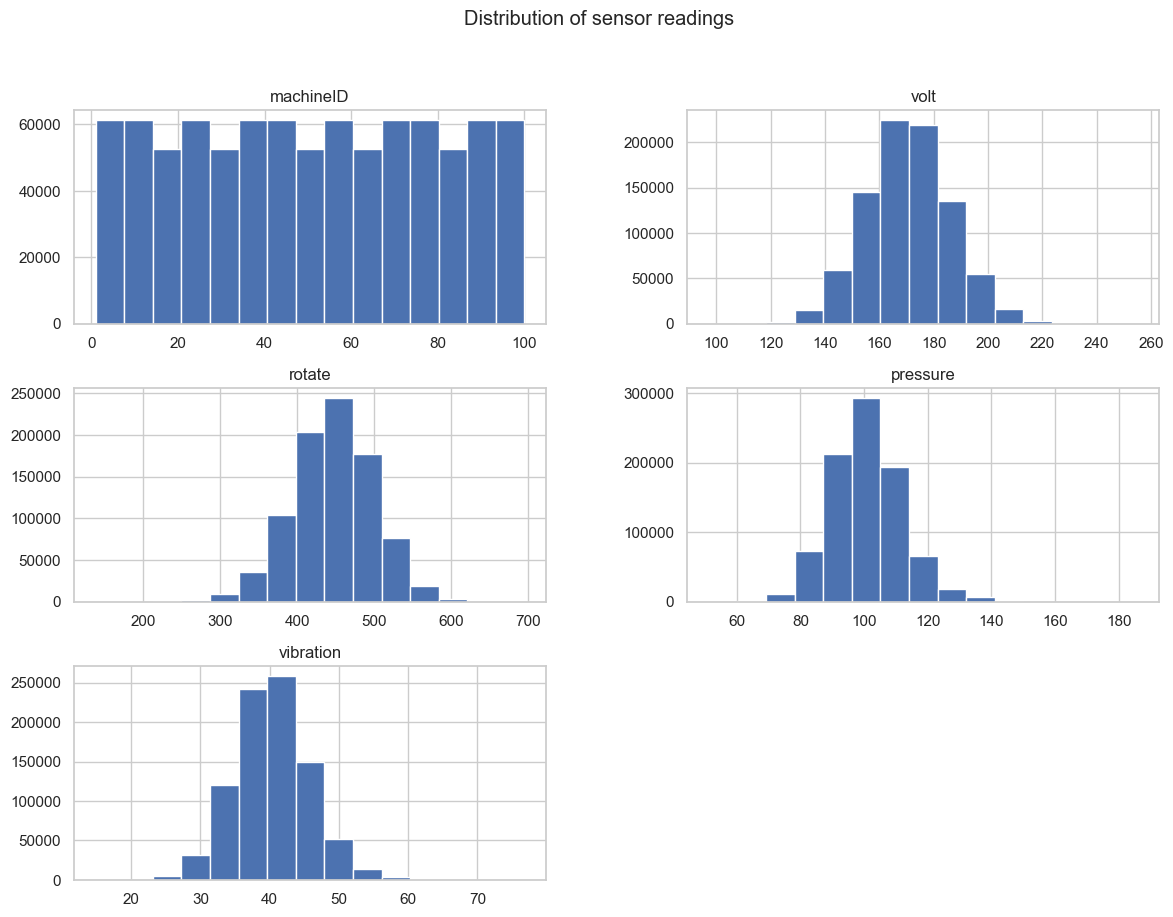

In [5]:
sns.set(style="whitegrid")

cols = telemetry.select_dtypes(include="number").columns

# Histograms for all numeric features

telemetry[cols].hist(figsize=(14,10), bins = 15)
plt.suptitle("Distribution of sensor readings")
plt.show

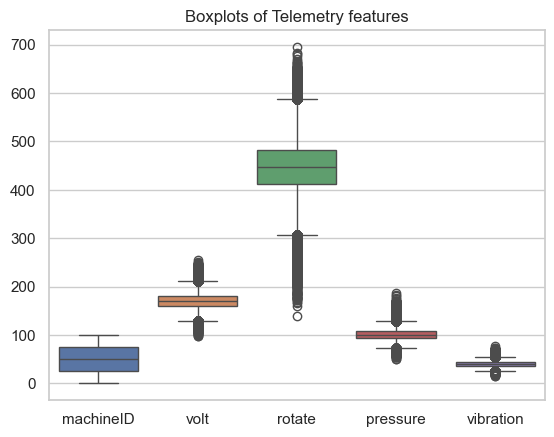

In [6]:
# Box plot to detect outliers
plt.Figure(figsize=(16,8))
sns.boxplot(data=telemetry[cols])
plt.title("Boxplots of Telemetry features")
plt.show()

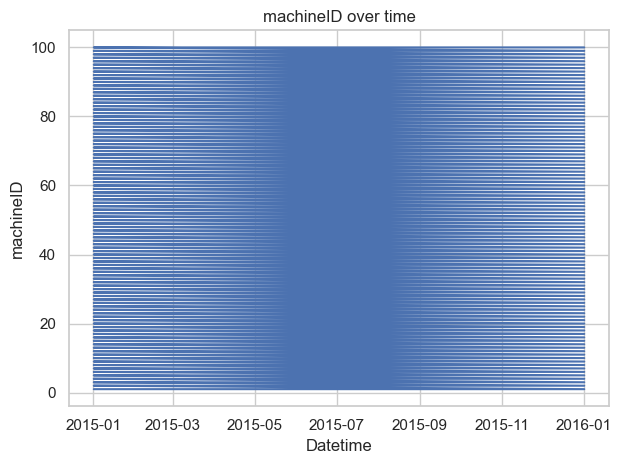

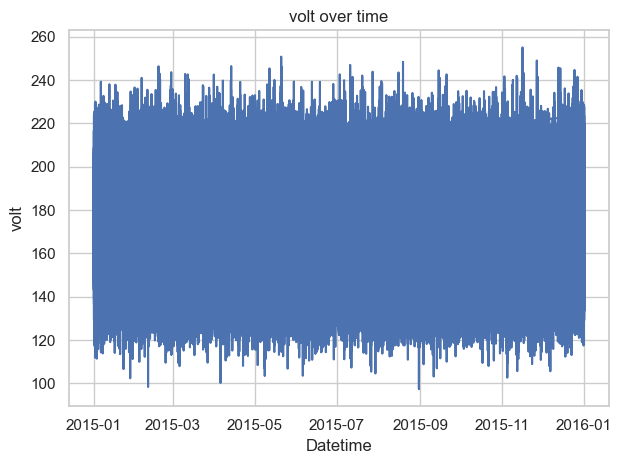

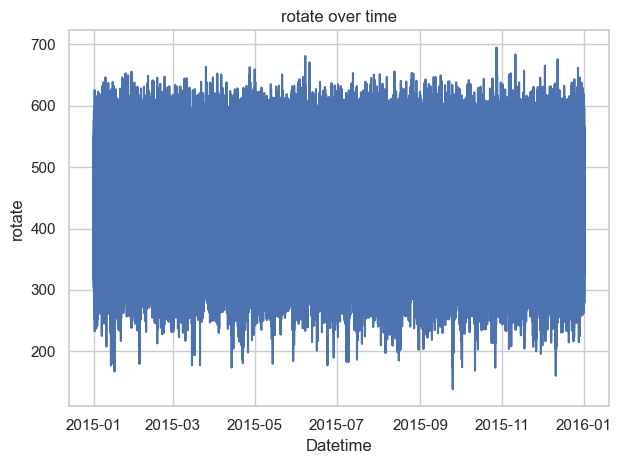

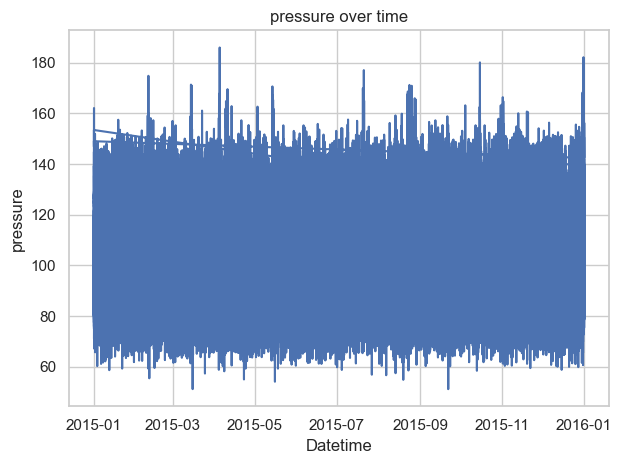

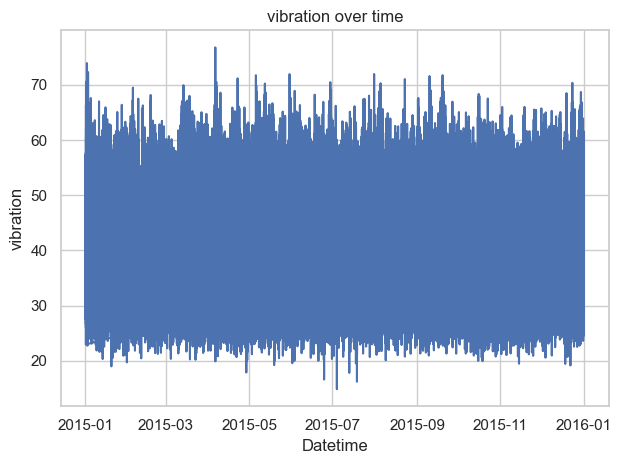

In [7]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])
maint['datetime'] = pd.to_datetime(maint['datetime'])

for col in cols:
    plt.Figure(figsize=(14,6))
    plt.plot(telemetry["datetime"], telemetry[col])
    plt.title(f"{col} over time")
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [8]:
# Failure.csv file
print("Failures:")
print(failures.head())
print("\nFailure type distribution:")
print(failures['failure'].value_counts())
print(f"\nTotal failures: {len(failures)}")
print(f"Machines with failures: {failures['machineID'].nunique()}")

Failures:
             datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2
3 2015-06-19 06:00:00          1   comp4
4 2015-09-02 06:00:00          1   comp4

Failure type distribution:
failure
comp2    259
comp1    192
comp4    179
comp3    131
Name: count, dtype: int64

Total failures: 761
Machines with failures: 98


In [9]:
# Errors.csv
print("ERRORS DATA:")
print(errors.head())
print("\nError type distribution:")
print(errors['errorID'].value_counts())
print(f"\nTotal errors: {len(errors)}")

ERRORS DATA:
             datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3
2 2015-01-04 06:00:00          1  error5
3 2015-01-10 15:00:00          1  error4
4 2015-01-22 10:00:00          1  error4

Error type distribution:
errorID
error1    1010
error2     988
error3     838
error4     727
error5     356
Name: count, dtype: int64

Total errors: 3919


In [10]:
# Maintenance.csv
print("MAINTENANCE DATA:")
print(maint.head())
print("\nMaintenance component distribution:")
print(maint['comp'].value_counts())
print(f"\nTotal maintenance events: {len(maint)}")

MAINTENANCE DATA:
             datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
3 2014-12-13 06:00:00          1  comp1
4 2015-01-05 06:00:00          1  comp4

Maintenance component distribution:
comp
comp2    863
comp4    811
comp3    808
comp1    804
Name: count, dtype: int64

Total maintenance events: 3286


In [11]:
# Machines.csv (Meta data)
print("MACHINES DATA:")
print(machines.head())
print("\nMachine model distribution:")
print(machines['model'].value_counts())
print("\nAge statistics:")
print(machines['age'].describe())

MACHINES DATA:
   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

Machine model distribution:
model
model3    35
model4    32
model2    17
model1    16
Name: count, dtype: int64

Age statistics:
count    100.000000
mean      11.330000
std        5.856974
min        0.000000
25%        6.750000
50%       12.000000
75%       16.000000
max       20.000000
Name: age, dtype: float64


Checking for any missing values or NAN values in all the files

In [12]:
print(f"Telemetry: {telemetry.isnull().sum().sum()}")
print(f"Errors: {errors.isnull().sum().sum()}")
print(f"Failures: {failures.isnull().sum().sum()}")
print(f"Maintenance: {maint.isnull().sum().sum()}")
print(f"Machines: {machines.isnull().sum().sum()}")

Telemetry: 0
Errors: 0
Failures: 0
Maintenance: 0
Machines: 0


Creating a rolling window for the telemetry sensor data to detect trends, sudden spikes, abnormal behaviour and signs of machine failure

In [13]:
def create_telemetry_features(df, windows=[3, 6, 12, 24]):
    """
    Create rolling mean and std features for telemetry data
    Windows are in hours (data is hourly)
    """
    df = df.sort_values(['machineID', 'datetime'])
    
    sensor_cols = ['volt', 'rotate', 'pressure', 'vibration']
    
    for window in windows:
        for col in sensor_cols:
            # Rolling mean
            df[f'{col}_rolling_mean_{window}h'] = df.groupby('machineID')[col].transform(
                lambda x: x.rolling(window=window, min_periods=1).mean()
            )
            
            # Rolling std 
            df[f'{col}_rolling_std_{window}h'] = df.groupby('machineID')[col].transform(
                lambda x: x.rolling(window=window, min_periods=1).std()
            )
    
    return df

print("Creating telemetry features...")
telemetry_features = create_telemetry_features(telemetry.copy())
print(f"Telemetry features shape: {telemetry_features.shape}")
print(f"New columns: {telemetry_features.shape[1] - telemetry.shape[1]}")

Creating telemetry features...
Telemetry features shape: (876100, 38)
New columns: 32


Create error count features
Count number of errors of each type in past time windows

In [14]:
def create_error_features(telemetry_df, errors_df, windows=[24, 48, 72]):
    
    # Create a base dataframe with all machine-datetime combinations
    df = telemetry_df[['machineID', 'datetime']].copy()
    
    error_types = errors_df['errorID'].unique()
    
    for window in windows:
        for error_type in error_types:
            # Filter errors of specific type
            error_subset = errors_df[errors_df['errorID'] == error_type][['machineID', 'datetime']]
            error_subset['error_count'] = 1
            
            # Merge with main dataframe
            merged = df.merge(error_subset, on=['machineID', 'datetime'], how='left')
            merged['error_count'] = merged['error_count'].fillna(0)
            
            # Calculate rolling sum
            merged = merged.sort_values(['machineID', 'datetime'])
            df[f'error_{error_type}_{window}h'] = merged.groupby('machineID')['error_count'].transform(
                lambda x: x.rolling(window=window, min_periods=1).sum()
            )
    
    return df

error_features = create_error_features(telemetry_features, errors)
print(f"Error features shape: {error_features.shape}")
error_features.to_csv(r"D:\02_Work\04_projects\Predicitve maintenance\error_features.csv", index=False)

Error features shape: (876100, 17)


Calculating the days since the last maintenance for each component

In [15]:
def create_maintenance_features(telemetry_df, maint_df, sentinel=999.0):
    # Sentinel is used when no maintenance data exists
    # Create a clean base with just the keys we are focussed 
    
    df = telemetry_df[['machineID', 'datetime']].copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Sort and ensure it's monotonic within each machine

    df = df.sort_values(['machineID', 'datetime'], ignore_index=True)
        
    maint_df = maint_df.copy()
    maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
    
    components = maint_df['comp'].unique()
    
    for comp in components:
        # Filter to this component's maintenance
        comp_maint = maint_df[maint_df['comp'] == comp][['machineID', 'datetime']].copy()
        
        # if the maintenance data for a component is empty use the sentinel data
        if comp_maint.empty:
            df[f'days_since_maint_{comp}'] = float(sentinel)
            continue
        
        # Rename for clarity
        comp_maint.columns = ['machineID', 'maint_date']
        
        # Sort the maintenance data
        comp_maint = comp_maint.sort_values(['machineID', 'maint_date'], ignore_index=True)
        
        # Perform merge_asof separately for each machine to avoid sorting issues
        result_pieces = []
        
        # Make sure we're working with current df that has machineID
        machines = df['machineID'].unique()
        
        for machine_id in machines:
            # Get data for this machine from the telemetry data
            machine_tel = df[df['machineID'] == machine_id].copy()
            machine_maint = comp_maint[comp_maint['machineID'] == machine_id].copy()
            
            if machine_maint.empty:
                # No maintenance for this machine
                machine_tel['maint_date'] = pd.NaT
            else:
                # Merge for this machine - don't include machineID in merge since it's already there
                machine_tel = pd.merge_asof(
                    machine_tel.sort_values('datetime'),
                    machine_maint[['maint_date']].sort_values('maint_date'),
                    left_on='datetime',
                    right_on='maint_date',
                    direction='backward',
                    allow_exact_matches=True
                )
            
            result_pieces.append(machine_tel)
        
        # Combine all machines
        df = pd.concat(result_pieces, ignore_index=True)
        
        # Calculate days since maintenance
        delta = df['datetime'] - df['maint_date']
        days = delta.dt.total_seconds() / 86400.0
        df[f'days_since_maint_{comp}'] = days.fillna(float(sentinel))
        
        # Drop helper column
        df = df.drop(columns=['maint_date'])
    
    # Sort back to original order
    df = df.sort_values(['machineID', 'datetime'], ignore_index=True)
    
    return df
maint_features = create_maintenance_features(telemetry_features, maint)
print(f"Maintenance features shape: {maint_features.shape}")
maint_features.to_csv(r"D:\02_Work\04_projects\Predicitve maintenance\maint_features.csv", index=False)

Maintenance features shape: (876100, 6)


Merging all the derived features together for further use and understanding

In [16]:
# Copying the telemetry features
final_df = telemetry_features.copy()

# Merge error features
final_df = final_df.merge(error_features, on=['machineID', 'datetime'], how='left')

# Merge maintenance features  
final_df = final_df.merge(maint_features, on=['machineID', 'datetime'], how='left')

# Merge machine metadata
final_df = final_df.merge(machines, on='machineID', how='left')

# One-hot encode categorical variables
final_df = pd.get_dummies(final_df, columns=['model'], prefix='model')

print(f"Merged features shape: {final_df.shape}")
final_df.to_csv(r"D:\02_Work\04_projects\Predicitve maintenance\merged_features.csv", index=False)

Merged features shape: (876100, 62)


Now we will create a binary target: Will the machine fail in the next X hours?
Target variable Creation:

In [32]:
def create_target(df, failures_df, prediction_window_hours):
    
    df = df.copy()
    df['failure_within_window'] = 0
    
    # For each failure, mark the prediction window before it
    for idx, failure_row in failures_df.iterrows():
        machine = failure_row['machineID']
        failure_time = failure_row['datetime']
        
        # Mark records within the prediction window
        mask = (
            (df['machineID'] == machine) & 
            (df['datetime'] >= failure_time - pd.Timedelta(hours=prediction_window_hours)) &
            (df['datetime'] < failure_time)
        )
        
        df.loc[mask, 'failure_within_window'] = 1
    
    return df

print("Creating target variable")
prediction_window_hours=2*24
final_df = create_target(final_df, failures, prediction_window_hours)
print(final_df.iloc[:, [0, 1, 62]])
print(f"\nTarget distribution:")
print(final_df['failure_within_window'].value_counts())
print(f"\nFailure rate: {final_df['failure_within_window'].mean()*100:.2f}%")

Creating target variable
                  datetime  machineID  failure_within_window
0      2015-01-01 06:00:00          1                      0
1      2015-01-01 07:00:00          1                      0
2      2015-01-01 08:00:00          1                      0
3      2015-01-01 09:00:00          1                      0
4      2015-01-01 10:00:00          1                      0
...                    ...        ...                    ...
876095 2016-01-01 02:00:00        100                      0
876096 2016-01-01 03:00:00        100                      0
876097 2016-01-01 04:00:00        100                      0
876098 2016-01-01 05:00:00        100                      0
876099 2016-01-01 06:00:00        100                      0

[876100 rows x 3 columns]

Target distribution:
failure_within_window
0    842140
1     33960
Name: count, dtype: int64

Failure rate: 3.88%


RUL (Remaining Useful Life estimation) Target variable:


RUL Statistics:
count    876100.000000
mean        960.872274
std         712.308054
min           1.000000
25%         318.000000
50%         770.000000
75%        1755.000000
max        2000.000000
Name: RUL_hours, dtype: float64


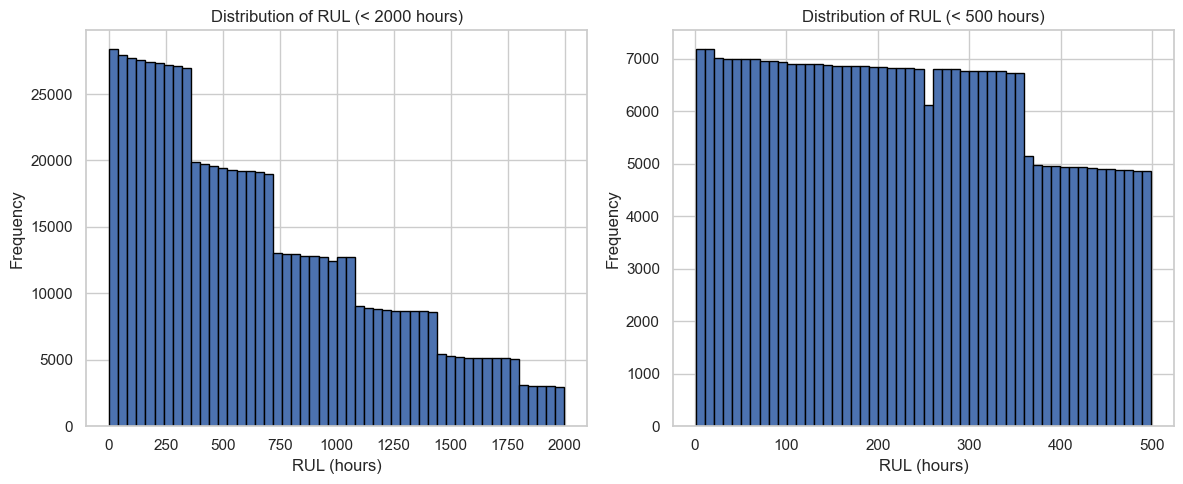

In [39]:
def create_rul_target(df, failures_df, max_rul=2000):
       
    df = df.copy()
    
    # Initialize with max_rul
    df['RUL_hours'] = float(max_rul)
    
    # For each failure event same as failure rate calculation
    for idx, failure_row in failures_df.iterrows():
        machine = failure_row['machineID']
        failure_time = failure_row['datetime']
        
        # Find all readings Before this failure for this machine
        mask = (
            (df['machineID'] == machine) & 
            (df['datetime'] < failure_time)
        )
        
        # Calculate hours until failure for each reading
        time_to_failure = (failure_time - df.loc[mask, 'datetime']).dt.total_seconds() / 3600.0
        
        # Update RUL with minimum (in case of multiple failures)
        # We keep the smaller RUL (nearest failure)
        df.loc[mask, 'RUL_hours'] = df.loc[mask, 'RUL_hours'].combine(
            time_to_failure, 
            min
        )
    df = df.iloc[:, [0, 1, -1]]

    
    return df


# Usage
rul_df = create_rul_target(final_df, failures, max_rul=2000)
rul_df.to_csv(r"D:\02_Work\04_projects\Predicitve maintenance\RUL_of_models.csv", index=False)

print("\nRUL Statistics:")
print(final_df['RUL_hours'].describe())

# Plot for RUL
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(final_df['RUL_hours'][final_df['RUL_hours'] < 2000], bins=50, edgecolor='black')
plt.xlabel('RUL (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of RUL (< 2000 hours)')

plt.subplot(1, 2, 2)
plt.hist(final_df['RUL_hours'][final_df['RUL_hours'] < 500], bins=50, edgecolor='black')
plt.xlabel('RUL (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of RUL (< 500 hours)')

plt.tight_layout()
plt.show()

Visulization of parameters and models with their age:


C:\Users\Guru Prasaath P\AppData\Local\Temp\ipykernel_32928\747915053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_counts, x= 'model', y= 'count', palette='viridis')


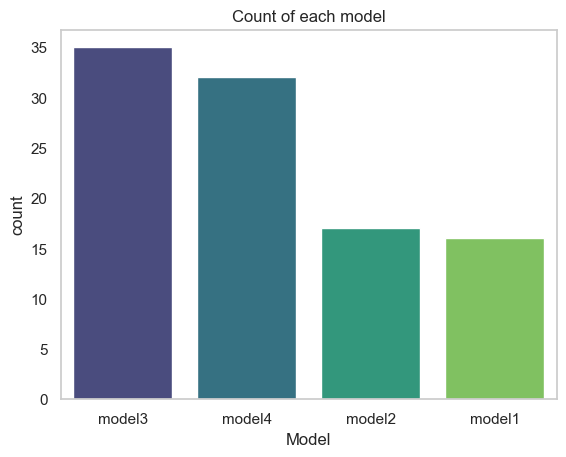

In [52]:
model_counts = machines['model'].value_counts().reset_index()
sns.barplot(data=model_counts, x= 'model', y= 'count', palette='viridis')
plt.title('Count of each model')
plt.xlabel('Model')
plt.ylabel('count')
plt.grid(False)
plt.show()

C:\Users\Guru Prasaath P\AppData\Local\Temp\ipykernel_32928\2797513668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=machines, x= 'model', y= 'age', palette='viridis',errorbar=('sd'))


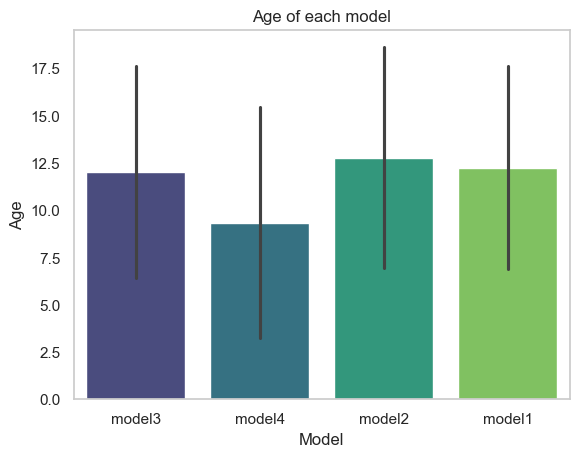

In [56]:
sns.barplot(data=machines, x= 'model', y= 'age', palette='viridis',errorbar=('sd'))
plt.title('Age of each model')
plt.xlabel('Model')
plt.ylabel('Age')
plt.grid(False)
plt.show()

Visualizing failure of each component over time

In [74]:

failures['failure']=1
errors['errorID'] = 1
maint['maint_comp']=maint['comp']

df1=pd.merge(telemetry,machines,on='machineID',how='left')
df2=pd.merge_asof(df1.sort_values('datetime'),
                  errors.sort_values('datetime'),
                  by='machineID',
                  on='datetime',
                  direction='backward'
                 )

df3=pd.merge_asof(df2.sort_values('datetime'),
                 maint.sort_values('datetime'),
                 by='machineID',
                 on='datetime',
                 direction='backward')

df4=pd.merge_asof(df3.sort_values('datetime'),
                 failures.sort_values('datetime'),
                 by='machineID',
                 on='datetime',
                 direction='forward')

df4['errorID']=df4['errorID'].fillna(0)
df4['failure']=df4['failure'].fillna(0)
df4['failure']=df4['failure'].astype(int)
print(df4)



                  datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 06:00:00         53  183.084582  420.980061  109.235805   
2      2015-01-01 06:00:00         99  168.596133  384.747105  110.921131   
3      2015-01-01 06:00:00         12  171.404215  576.923563   97.145400   
4      2015-01-01 06:00:00          6  136.878588  492.088420  149.003582   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 06:00:00         70  188.135372  457.661580   89.725251   
876096 2016-01-01 06:00:00         71  174.028202  349.326013  111.231561   
876097 2016-01-01 06:00:00         48  183.822000  410.036090  100.201486   
876098 2016-01-01 06:00:00         49  181.656293  423.439324  112.353263   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration   model  age  errorID   comp maint_comp  failure  
0     

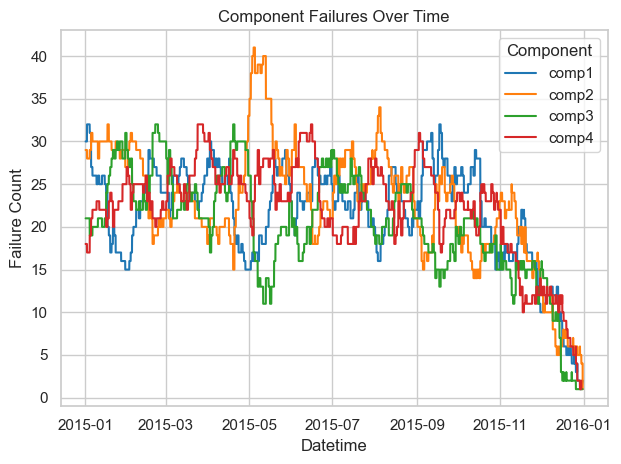

In [ ]:
df4=df4[df4['failure']==1]
failure_counts = (df4.groupby(['datetime', 'comp']).size().reset_index(name='Count'))
sns.lineplot(data=failure_counts, x='datetime', y='Count', hue='comp', palette='tab10')

plt.title('Component Failures Over Time')
plt.xlabel('Datetime')
plt.ylabel('Failure Count')
plt.legend(title='Component')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Guru Prasaath P\AppData\Local\Temp\ipykernel_32928\3025713881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_error, x='errorID', y='count', palette='viridis')


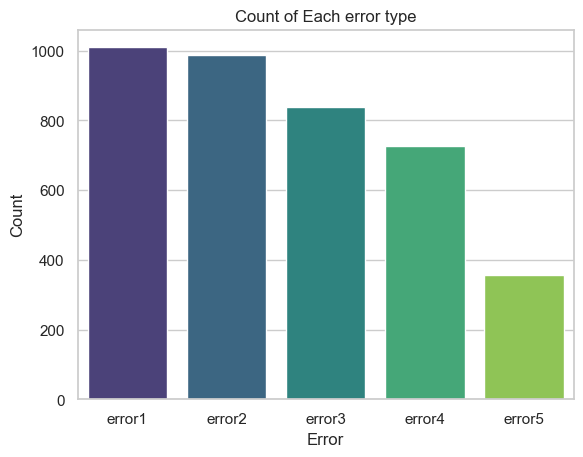

In [78]:
count_error = errors['errorID'].value_counts().reset_index()
sns.barplot(data=count_error, x='errorID', y='count', palette='viridis')
plt.title('Count of Each error type')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()